In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif



def load_data():
    file_path_data = "CATSnDOGS.csv"
    file_path_labels = "Labels.csv"
    delimiter=',' 
    df_data = pd.read_csv(file_path_data, delimiter=delimiter, header=0, quotechar='"')
    df_labels = pd.read_csv(file_path_labels, delimiter=delimiter, header=0, quotechar='"')
    return df_data, df_labels 

def standardize(train_data, test_data):
    sc = StandardScaler()
    train_data = sc.fit_transform(train_data)
    test_data = sc.transform(test_data)
    return train_data, test_data


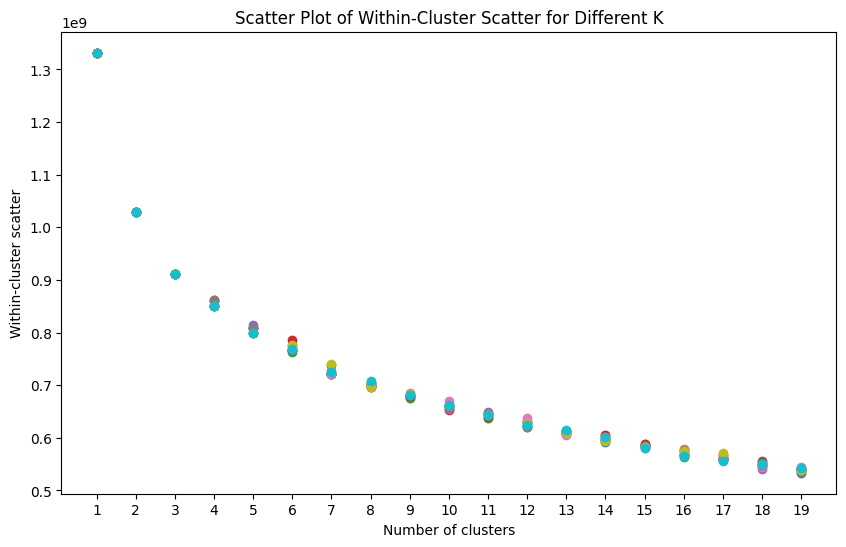

In [37]:
#Cluster the data set. Do the clusters agree with the class labels? Does changing the number of clusters 
#have an impact on the overlap with the class labels?
#What characteristics of the data does the clustering pick up?
#Please think carefully about how you go about this question - how do you choose your input 
#(e.g. do you perform preprocessing or not) to the clustering algorithm? what method and settings? 
#Is it as clear cut how to make these choices if you didn't know the labels?
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

def compute_wcss(X, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.inertia_

data, labels = load_data()
data = data.values[labels.values.ravel() == 0].T
#data = data.T 

k_range = range(1, 20)
num_iterations = 10
# Perform the process several times and store the results
results = []
for _ in range(num_iterations):
    wcss_values = [compute_wcss(data, k) for k in k_range]
    results.append(wcss_values)

# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Plot the scatter plot for each iteration
plt.figure(figsize=(10, 6))
for i in range(num_iterations):
    plt.scatter(k_range, results[i], marker='o', label=f'Iteration {i+1}')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster scatter')
plt.title('Scatter Plot of Within-Cluster Scatter for Different K')
plt.xticks(np.arange(1, 20, 1))
plt.show()

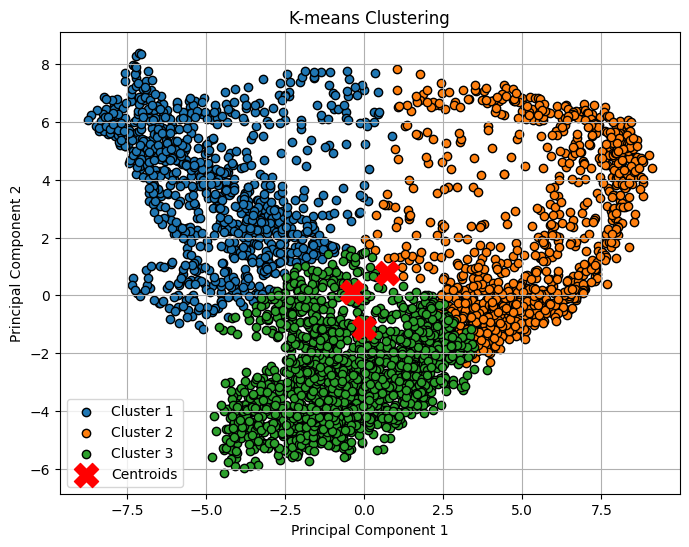

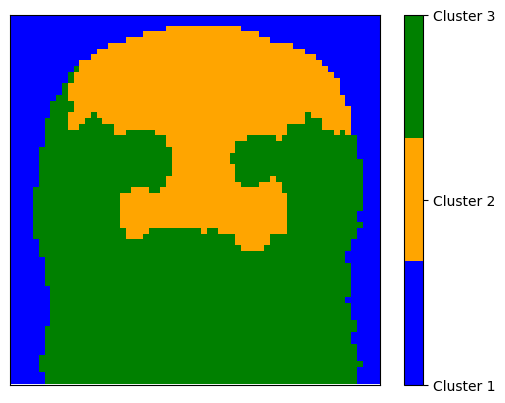

In [31]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

data, labels = load_data()
data = data.values[labels.values.ravel() == 1].T
#data = data.values.T 
sc = StandardScaler()
data = sc.fit_transform(data)
num_clusters = 3
num_img = 8 
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(data)

#for i in range(num_clusters):
#    print(i+1)
#    d = data[np.where(cluster_labels == i)[0]] 
#    plt.figure(figsize=(10,5))
#    for j in range(min(len(d), num_img)): 
#        plt.subplot(1,min(len(d), num_img)+1,j+1)
#        plt.imshow(d[j].reshape(64, 64).T, cmap='gray')
#        plt.xticks([])
#        plt.yticks([])
#    plt.show()

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(data)
# Plot the clusters
plt.figure(figsize=(8, 6))
for label in np.unique(cluster_labels):
    plt.scatter(X_pca[cluster_labels == label, 0], X_pca[cluster_labels == label, 1], label=f'Cluster {label+1}', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

cmap = ListedColormap(['blue', 'orange', 'green'])


cluster_labels = cluster_labels.reshape(64,64)
plt.imshow(cluster_labels.T, cmap=cmap)
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.xticks([])
plt.yticks([])
plt.show() 

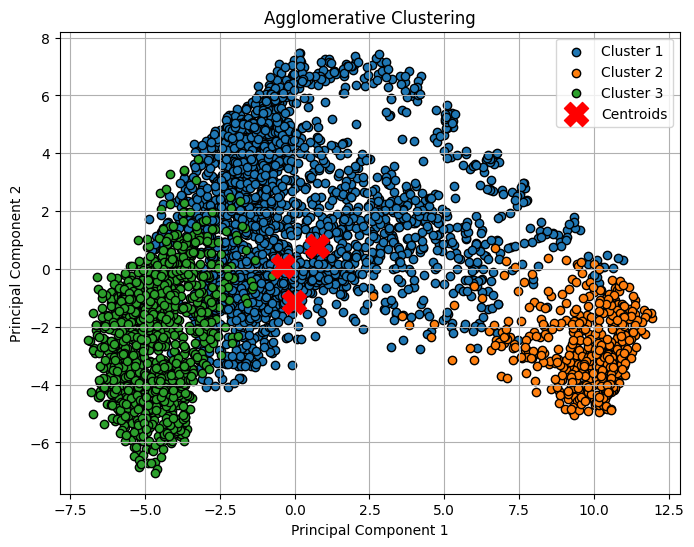

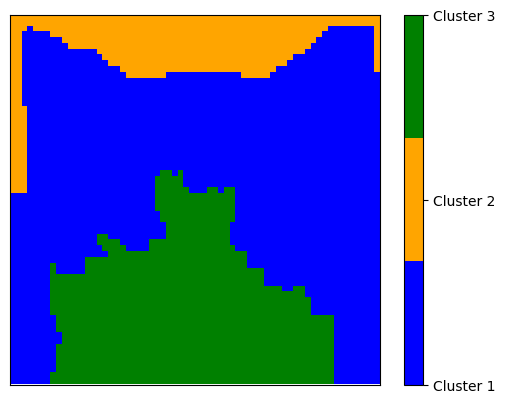

In [36]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.cluster import AgglomerativeClustering


data, labels = load_data()
data = data.values[labels.values.ravel() == 0].T
#data = data.values.T 
sc = StandardScaler()
data = sc.fit_transform(data)
num_clusters = 3
num_img = 8 
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = agg_clustering.fit_predict(data)
#for i in range(num_clusters):
#    print(i+1)
#    d = data[np.where(cluster_labels == i)[0]] 
#    plt.figure(figsize=(10,5))
#    for j in range(min(len(d), num_img)): 
#        plt.subplot(1,min(len(d), num_img)+1,j+1)
#        plt.imshow(d[j].reshape(64, 64).T, cmap='gray')
#        plt.xticks([])
#        plt.yticks([])
#    plt.show()

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(data)
# Plot the clusters
plt.figure(figsize=(8, 6))
for label in np.unique(cluster_labels):
    plt.scatter(X_pca[cluster_labels == label, 0], X_pca[cluster_labels == label, 1], label=f'Cluster {label+1}', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

cmap = ListedColormap(['blue', 'orange', 'green'])


cluster_labels = cluster_labels.reshape(64,64)
plt.imshow(cluster_labels.T, cmap=cmap)
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.xticks([])
plt.yticks([])
plt.show() 